#Neural network

1. Neural network: là một mạng lưới mô phỏng lại cấu trúc của não bộ con người bao gồm các neuron kết nối với nhau thành từng tầng và dữ liệu sẽ đi qua trong quá trình xử lý.
2. Neuron: Dữ liệu đầu vào đi qua một hàm tuyến tính, sau đó đi qua một hàm phi tuyến (kích hoạt) để tạo đầu ra

(hàm phi tuyến giúp hệ thống tăng tính linh hoạt, khả năng học được các mối quan hệ phi tuyến và giải quyết được các bài toán phức tạp trong thực tế, nếu không có các hàm kích hoạt phi tuyến, thì mạng nơ-ron dù có nhiều lớp vẫn sẽ có hiệu quả như một lớp)
3. Layer:
Một mạng nơ-ron với 3 lớp thường bao gồm:
  - Lớp đầu vào (Input Layer): Nhận dữ liệu đầu vào từ môi trường bên ngoài

  (Số lượng nơ-ron trong lớp này thường bằng số chiều (feature) của dữ liệu đầu vào.)

  - Lớp ẩn (Hidden Layer): Tính toán để trích xuất đặc trưng và tìm hiểu mối quan hệ trong dữ liệu. Gồm các nơ-ron kết nối với nhau thông qua 1 hàm tuyến. Số lượng neutron tùy chỉnh.

  - Lớp đầu ra (Output Layer): Kết quả cuối cùng. Số neutron phụ thuộc vào loại bài toán. Phân loại nhị phân: 1 nơ-ron (đầu ra là xác suất). Phân loại đa lớp: Số nơ-ron = Số lớp cần phân loại. Hồi quy: Số nơ-ron = Số giá trị đầu ra cần dự đoán.

  => Neural Network là mô hình tính toán gồm các lớp nơ-ron, học mối quan hệ phức tạp bằng cách truyền và xử lý dữ liệu qua các phép biến đổi.

4. Các loại NN thường gặp
  - **Mạng Kết Nối Đầy Đủ (Fully Connected Networks):** Tất cả các nút trong một lớp được kết nối với lớp tiếp theo
  - **Mạng Nơ-ron Tích Chập (Convolutional Neural Networks - CNNs):** Dành cho dữ liệu hình ảnh
  - **Mạng Nơ-ron Hồi Quy (Recurrent Neural Networks - RNNs):** Dành cho dữ liệu tuần tự

**Kết luận**
Có thể và không nên sử dụng mạng nơ-ron (neural network) cho dữ liệu tuyến tính

Có thể: Mạng nơ-ron có thể học các mối quan hệ tuyến tính. Tuy nhiên có thể gặp vấn đề như học chậm, học không hiệu quả, hoặc không cần thiết.


Không nên: Nếu có dữ liệu tuyến tính, có thể có phương pháp học khác như hồi quy tuyến tính, mà không cần sử dụng mạng nơ-ron. Việc sử dụng mạng nơ-ron để học dữ liệu tuyến tính có thể gây lãng phí tài nguyên tính toán, và có thể làm giảm hiệu suất nếu mô hình quá phức tạp mà không cần thiết.

# Code thực tế

## import

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
import numpy as np
import requests
from pathlib import Path

## tạo test case

In [ ]:
X, y = make_circles(1000,
                    noise = 0.05,
                    random_state=30)

In [ ]:
print(f"{X[:5]}")
print(f"{y[:5]}")

[[ 0.49704984 -0.73350677]
 [ 0.52163578 -0.63880237]
 [ 0.71825518  0.09391552]
 [ 0.41495297  0.95499869]
 [ 0.1018219  -0.80098846]]
[1 1 1 0 1]


In [ ]:
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                       "label": y
                        })
circles.head(5)

,X1,X2,label
0,0.497050,-0.733507,1
1,0.521636,-0.638802,1
2,0.718255,0.093916,1
3,0.414953,0.954999,0
4,0.101822,-0.800988,1


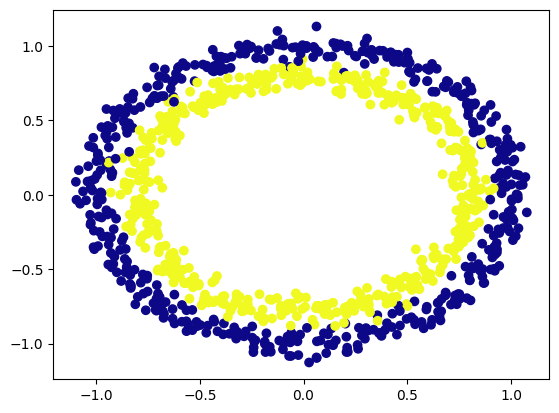

In [ ]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.plasma)

In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
# Chuyển x, y về dạng dữ liệu tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.4970, -0.7335],
         [ 0.5216, -0.6388],
         [ 0.7183,  0.0939],
         [ 0.4150,  0.9550],
         [ 0.1018, -0.8010]]),
 tensor([1., 1., 1., 0., 1.]))

In [ ]:
print(type(X))

<class 'torch.Tensor'>


In [ ]:
#chia dữ liệu thành tập test và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                y,test_size=0.2, #lấy 20% làm test
                                                random_state=30)

## Xây dựng model

### Model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class Circlesmodel(nn.Module): #extend từ nn
  def __init__(self):
    super().__init__()
    #Layer gồm 3 lớp
    self.layer1 = nn.Linear(in_features=2, out_features=10) #2 đầu vào 10 đầu ra
    self.layer2 = nn.Linear(in_features=10, out_features=5) #10 đầu vào 5 đầu ra
    self.layer3 = nn.Linear(in_features=5, out_features=1) #5 đầu vào và 1 đầu ra

  def forward(self,x):
     x = self.layer1(x) # Hàm kích hoạt để học phi tuyến  ReLU giúp lớp cuối tạo ra đầu ra tuyến tính ổn định dễ dàng chuyển đổi sang xác suất
     x = self.layer2(x) # Đưa dữ liệu qua layer2
     return self.layer3(x)

model0 = Circlesmodel().to(device)
model0

Circlesmodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)

**Relu**

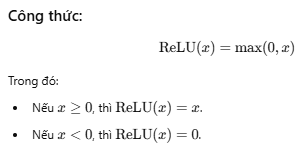

Không âm: ReLU sẽ "chặn" tất cả các giá trị âm và chỉ giữ lại giá trị dương. Điều này giúp tăng tốc quá trình huấn luyện mạng nơ-ron.

Đơn giản và hiệu quả: ReLU giúp mô hình học các đặc trưng phi tuyến tính một cách hiệu quả mà không cần tính toán phức tạp.

Khắc phục vanishing gradient: ReLU giúp giảm thiểu vấn đề vanishing gradient, vấn đề thường gặp khi sử dụng các hàm kích hoạt khác như Sigmoid hoặc Tanh.

*Vanishing Gradient xảy ra khi giá trị của gradient trở nên cực kỳ nhỏ, gần bằng 0 trong quá trình backpropagation. Điều này khiến các trọng số của các lớp sâu trong mạng không thay đổi đáng kể và mô hình không thể học hiệu quả.*

**Ưu điểm:**

Đơn giản: Cách tính toán của ReLU rất nhanh chóng và hiệu quả.

Tính toán hiệu quả: ReLU dễ dàng tính toán trên các phần cứng như GPU, giúp tăng tốc quá trình huấn luyện.

Giảm vanishing gradient: Các giá trị dương trong ReLU giúp tránh việc gradient bị suy yếu trong các lớp sâu của mạng.

**Nhược điểm:**

Dying ReLU Problem: Nếu một số lượng lớn các giá trị đầu vào của ReLU luôn nhỏ hơn 0, các neurone đó sẽ không bao giờ được kích hoạt (trở thành "chết"), dẫn đến việc mô hình không thể học được từ những neurone này.

In [ ]:
untrained_preds = model0(X_test.to(device))

In [ ]:
print(f"Độ dài của dự đoán: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Độ dài của ví dụ test: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nn10 giá trị dự đoán đầu tiên:\n{untrained_preds[:10]}")
print(f"\n10 giá trị test đầu tiên:\n{y_test[:10]}")

Độ dài của dự đoán: 200, Shape: torch.Size([200, 1])
Độ dài của ví dụ test: 200, Shape: torch.Size([200])

n10 giá trị dự đoán đầu tiên:
tensor([[-0.4406],
        [-0.2910],
        [-0.4799],
        [-0.3100],
        [-0.2703],
        [-0.5315],
        [-0.4458],
        [-0.3480],
        [-0.2730],
        [-0.3614]], grad_fn=<SliceBackward0>)

10 giá trị test đầu tiên:
tensor([0., 0., 0., 0., 0., 1., 1., 1., 0., 0.])


### Hàm loss

In [ ]:
lossfc = nn.BCEWithLogitsLoss()
#Chọn Binary Cross Entropy Loss vì đây là bài toán phân loại nhị phân phân loại dữ liệu gồm 2 nhãn xanh và đỏ
#LogitsLoss vì ở trên chưa sử dụng hàm sigmoid
op = torch.optim.SGD(params=model0.parameters(),
                 lr=0.3)
#SGD chỉ sử dụng một mẫu mỗi lần cập nhật tham số giúp tăng tốc quá trình huấn luyện và giảm chi phí.

*BCEWithLogitsLoss = Binary Cross-Entropy (BCE) + sigmoid activation*

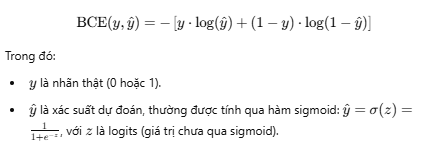

In [ ]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() #lần lượt so sánh 2 giá trị với nhau, sum() đếm số lần True, item() trả về kiểu int
  acc = (correct / len(y_pred)) * 100
  return acc


In [ ]:
#đưa ra dự đoán ban đầu của mô hình
y_logits = model0(X_test.to(device))[:5]
print(y_logits)

tensor([[-0.4406],
        [-0.2910],
        [-0.4799],
        [-0.3100],
        [-0.2703]], grad_fn=<SliceBackward0>)


In [ ]:
#sử dụng hàm sigmoid để đưa giá trị về dạng xác suất trong khoảng 0,1
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3916],
        [0.4278],
        [0.3823],
        [0.4231],
        [0.4328]], grad_fn=<SigmoidBackward0>)

In [ ]:
y_preds = torch.round(y_pred_probs)

# Tính toán đầu ra và làm tròn nhãn thành 0/1
y_pred_labels = torch.round(torch.sigmoid(model0(X_test.to(device))[:5]))
# Kết quả là y_preds, một tensor chứa các nhãn dự đoán (chỉ gồm 0 hoặc 1)
# So sánh kiểm tra tương đồng giữa 2 kq
print(torch.eq(y_preds.squeeze(), # squeeze() : Loại bỏ chiều dư thừa nếu có
               y_pred_labels.squeeze()))

# Loại bỏ chiều dư thừa
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [ ]:
epochs = 1000

# Đẩy data với thiết bi
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model0.train()

  y_logits = model0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = lossfc(y_logits, y_train)
  acc = accuracy(y_true=y_train,y_pred=y_pred)

  op.zero_grad()

  loss.backward()

  op.step()

  model0.eval()

  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = lossfc(test_logits, y_test)
    test_acc = accuracy(y_true = y_test,
                        y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71936, Accuracy: 49.62% | Test loss: 0.70858, Test acc: 51.50%
Epoch: 100 | Loss: 0.69302, Accuracy: 51.75% | Test loss: 0.69413, Test acc: 50.00%
Epoch: 200 | Loss: 0.69302, Accuracy: 52.12% | Test loss: 0.69411, Test acc: 49.50%
Epoch: 300 | Loss: 0.69302, Accuracy: 52.12% | Test loss: 0.69411, Test acc: 49.50%
Epoch: 400 | Loss: 0.69302, Accuracy: 52.00% | Test loss: 0.69411, Test acc: 49.50%
Epoch: 500 | Loss: 0.69302, Accuracy: 52.00% | Test loss: 0.69411, Test acc: 49.50%
Epoch: 600 | Loss: 0.69302, Accuracy: 52.12% | Test loss: 0.69411, Test acc: 49.50%
Epoch: 700 | Loss: 0.69302, Accuracy: 52.25% | Test loss: 0.69411, Test acc: 49.50%
Epoch: 800 | Loss: 0.69302, Accuracy: 52.25% | Test loss: 0.69411, Test acc: 49.50%
Epoch: 900 | Loss: 0.69302, Accuracy: 52.25% | Test loss: 0.69411, Test acc: 49.50%


In [ ]:
#kiểm tra và tải xuống file helper_functions.py để sử dụng plot_predictions và plot_decision_boundary
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading help er_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


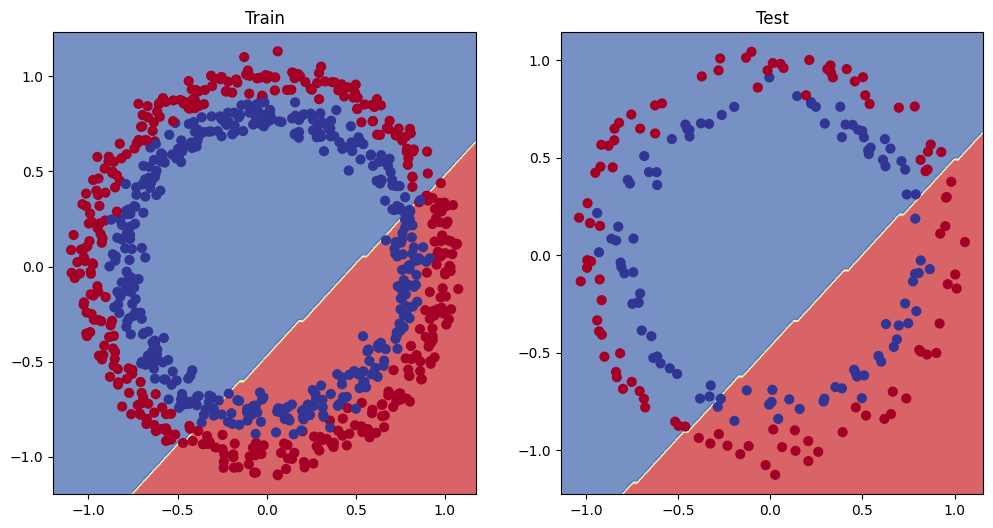

In [ ]:
# Vẽ decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)

In [ ]:
from sklearn.datasets import make_circles

x, y = make_circles(1000,
                    noise = 0.03,
                    random_state=42)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                y,test_size=0.2,
                                                random_state=42)

##Thay đổi thử số neutron trên hidden layer và thêm hàm kích hoạt

In [ ]:
class Circlesmodel3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=8)
    self.layer3 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model3 = Circlesmodel3().to(device)
model3

Circlesmodel3(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
lossfc = nn.BCEWithLogitsLoss()
op = torch.optim.SGD(params=model3.parameters(),
                 lr=0.5)

In [ ]:
from sklearn.datasets import make_circles

x, y = make_circles(1000,
                    noise = 0.03,
                    random_state=42)

import torch as t
x = t.from_numpy(x).type(t.float)
y = t.from_numpy(y).type(t.float)
device = "cuda" if t.cuda.is_available() else "cpu"
device

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                y,test_size=0.2,
                                                random_state=42)

epochs = 1000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model3.train()

  y_logits = model3(x_train).squeeze()
  y_pred = t.round(t.sigmoid(y_logits))

  loss = lossfc(y_logits, y_train)
  acc = accuracy(y_true=y_train,y_pred=y_pred)

  op.zero_grad()

  loss.backward()

  op.step()

  model3.eval()

  with t.inference_mode():
    test_logits = model3(x_test).squeeze()
    test_pred = t.round(t.sigmoid(test_logits))
    test_loss = lossfc(test_logits, y_test)
    test_acc = accuracy(y_true = y_test,
                        y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70448, Accuracy: 50.00% | Test loss: 0.70300, Test acc: 50.00%
Epoch: 100 | Loss: 0.67281, Accuracy: 62.38% | Test loss: 0.67960, Test acc: 56.50%
Epoch: 200 | Loss: 0.56809, Accuracy: 64.00% | Test loss: 0.66612, Test acc: 52.00%
Epoch: 300 | Loss: 0.45046, Accuracy: 67.50% | Test loss: 0.56247, Test acc: 58.00%
Epoch: 400 | Loss: 0.28376, Accuracy: 84.88% | Test loss: 0.42412, Test acc: 74.50%
Epoch: 500 | Loss: 0.03366, Accuracy: 99.88% | Test loss: 0.06078, Test acc: 100.00%
Epoch: 600 | Loss: 0.01910, Accuracy: 100.00% | Test loss: 0.03899, Test acc: 100.00%
Epoch: 700 | Loss: 0.01364, Accuracy: 100.00% | Test loss: 0.02981, Test acc: 100.00%
Epoch: 800 | Loss: 0.01070, Accuracy: 100.00% | Test loss: 0.02462, Test acc: 100.00%
Epoch: 900 | Loss: 0.00885, Accuracy: 100.00% | Test loss: 0.02122, Test acc: 100.00%


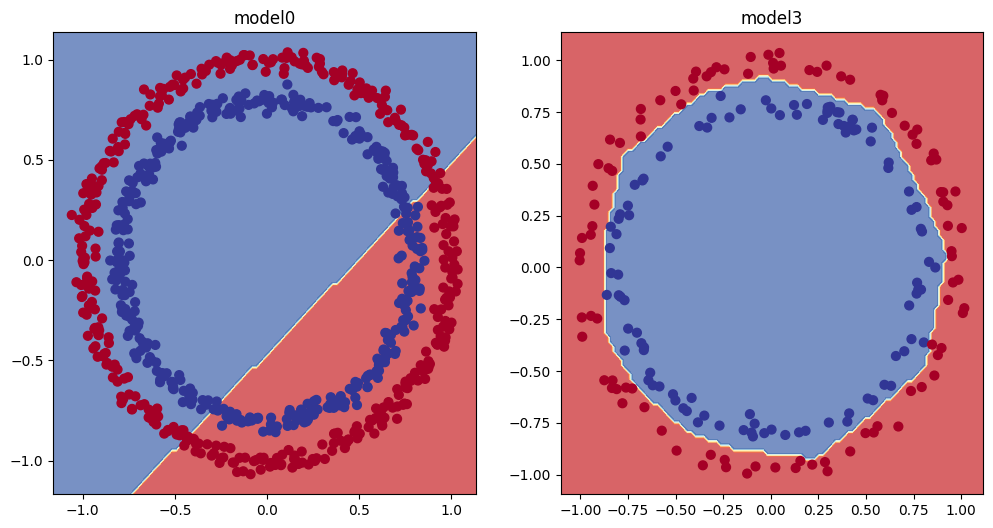

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("model0")
plot_decision_boundary(model0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("model3")
plot_decision_boundary(model3, x_test, y_test)

Sau khi thêm hàm kích hoạt mô hình đã học được mối quan hệ phi tuyền chứ không chia dữ liệu thành 2 nửa bằng 1 đường tuyến tính nữa

## Thử nn + hàm kích hoạt với hàm tuyến tính

In [ ]:
# Tạo data
X_reg = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_reg = 0.6 * X_reg + 0.4


print(len(X_reg))
X_reg[:5], y_reg[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.4000],
         [0.4060],
         [0.4120],
         [0.4180],
         [0.4240]]))

In [ ]:
split = int(0.8 * len(X_reg))
X_train_reg, y_train_reg = X_reg[:split], y_reg[:split]
X_test_reg, y_test_reg = X_reg[split:], y_reg[split:]
print(len(X_train_reg),
    len(y_train_reg),
    len(X_test_reg),
    len(y_test_reg))

80 80 20 20


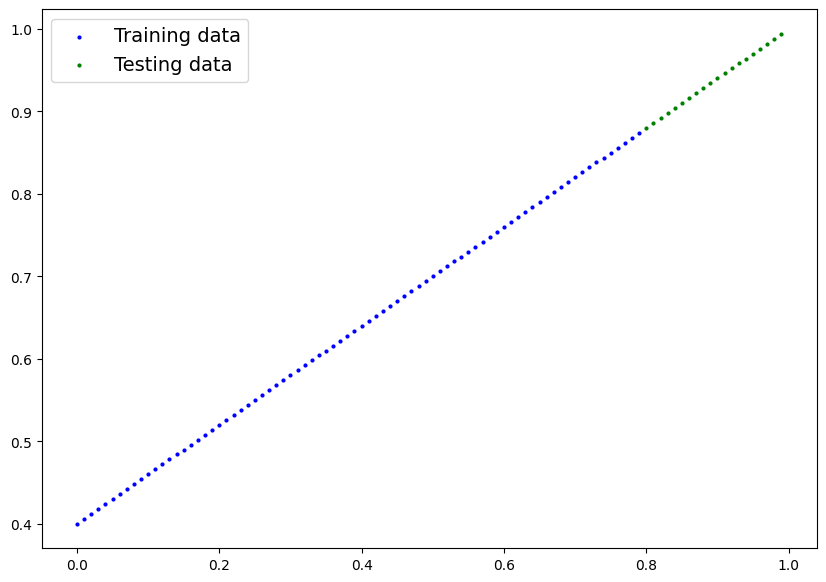

In [ ]:
plot_predictions(train_data=X_train_reg,
                 train_labels = y_train_reg,
                 test_data = X_test_reg,
                 test_labels = y_test_reg);

In [ ]:
class Circlesmodel(nn.Module): #extend từ nn
  def __init__(self):
    super().__init__()
    #Layer gồm 3 lớp
    self.layer1 = nn.Linear(in_features=1, out_features=10) #1 đầu vào 10 đầu ra
    self.layer2 = nn.Linear(in_features=10, out_features=5) #10 đầu vào 5 đầu ra
    self.layer3 = nn.Linear(in_features=5, out_features=1) #5 đầu vào và 1 đầu ra

  def forward(self,x):
     x = torch.relu(self.layer1(x)) # Hàm kích hoạt để học phi tuyến  ReLU giúp lớp cuối tạo ra đầu ra tuyến tính ổn định dễ dàng chuyển đổi sang xác suất
     x = torch.relu(self.layer2(x)) # Đưa dữ liệu qua layer2
     return self.layer3(x)

model0_linear = Circlesmodel().to(device)
model0_linear

Circlesmodel(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
lossfc = nn.BCEWithLogitsLoss()
op = torch.optim.SGD(params=model3.parameters(),
                 lr=0.5)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
y_logits = model0_linear(X_train_reg.to(device)).squeeze()
y_logits[:5]

tensor([-0.2545, -0.2546, -0.2547, -0.2549, -0.2550], grad_fn=<SliceBackward0>)

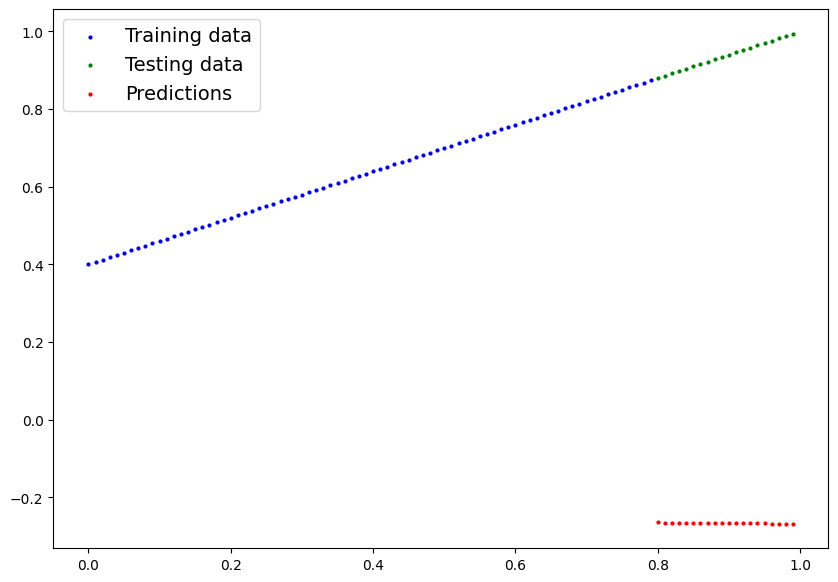

In [ ]:
model0_linear.eval()

with torch.inference_mode():
  y_preds = model0_linear(X_test_reg)


plot_predictions(train_data=X_train_reg.cpu(),
          train_labels=y_train_reg.cpu(),
          test_data=X_test_reg.cpu(),
          test_labels=y_test_reg.cpu(),
          predictions=y_preds.cpu());

In [ ]:
x,y = X_reg, y_reg
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                y,test_size=0.2,
                                                random_state=42)

epochs = 1000

x_train, y_train = x_train.to(device), y_train.squeeze().to(device)
x_test, y_test = x_test.to(device), y_test.squeeze().to(device)

for epoch in range(epochs):

  model0_linear.train()

  y_logits = model0_linear(x_train).squeeze()
  y_pred = t.round(t.sigmoid(y_logits))

  loss = lossfc(y_logits, y_train)
  acc = accuracy(y_true=y_train,y_pred=y_pred)

  op.zero_grad()

  loss.backward()

  op.step()

  model0_linear.eval()

  with t.inference_mode():
    test_logits = model0_linear(x_test).squeeze()
    test_pred = t.round(t.sigmoid(test_logits))
    test_loss = lossfc(test_logits, y_test)
    test_acc = accuracy(y_true = y_test,
                        y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 100 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 200 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 300 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 400 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 500 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 600 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 700 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 800 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%
Epoch: 900 | Loss: 0.75576, Accuracy: 0.00% | Test loss: 0.74569, Test acc: 0.00%


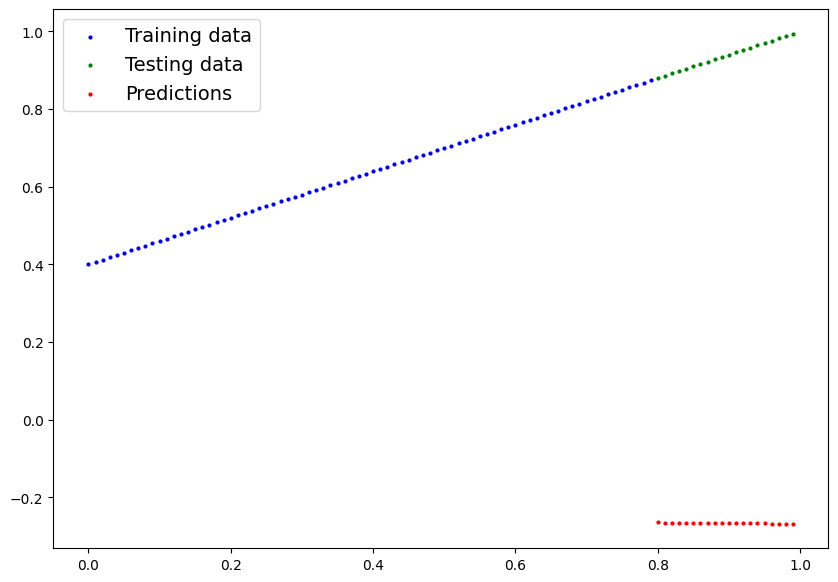

In [ ]:
model0_linear.eval()

with torch.inference_mode():
  y_preds = model0_linear(X_test_reg)


plot_predictions(train_data=X_train_reg.cpu(),
          train_labels=y_train_reg.cpu(),
          test_data=X_test_reg.cpu(),
          test_labels=y_test_reg.cpu(),
          predictions=y_preds.cpu());

###Đổi hàm loss

In [ ]:
class Linear(nn.Module): #extend từ nn
  def __init__(self):
    super().__init__()
    #Layer gồm 3 lớp
    self.layer1 = nn.Linear(in_features=1, out_features=10) #1 đầu vào 10 đầu ra
    self.layer2 = nn.Linear(in_features=10, out_features=5) #10 đầu vào 5 đầu ra
    self.layer3 = nn.Linear(in_features=5, out_features=1) #5 đầu vào và 1 đầu ra

  def forward(self,x):
     x = torch.relu(self.layer1(x)) # Hàm kích hoạt để học phi tuyến  ReLU giúp lớp cuối tạo ra đầu ra tuyến tính ổn định dễ dàng chuyển đổi sang xác suất
     x = torch.relu(self.layer2(x)) # Đưa dữ liệu qua layer2
     return self.layer3(x)

model11 = Linear().to(device)
model11

Linear(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)

Thay đổi hàm optim

In [ ]:
lossfc = nn.MSELoss()
op = torch.optim.Adam(params=model11.parameters(),
                 lr=0.0005)

In [ ]:
test = 1000

X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

for test in range(test):
    y_pred = model11(X_train_reg)

    loss = lossfc(y_pred, y_train_reg)

    op.zero_grad()

    loss.backward()

    op.step()

    model11.eval()
    with torch.inference_mode():
      test_pred = model11(X_test_reg)
      test_loss = lossfc(test_pred,y_test_reg)

    if test % 100 == 0:
      print(f"Test: {test} | Train Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Test: 0 | Train Loss: 0.00000 | Test loss: 0.00015
Test: 100 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 200 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 300 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 400 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 500 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 600 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 700 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 800 | Train Loss: 0.00000 | Test loss: 0.00009
Test: 900 | Train Loss: 0.00000 | Test loss: 0.00009


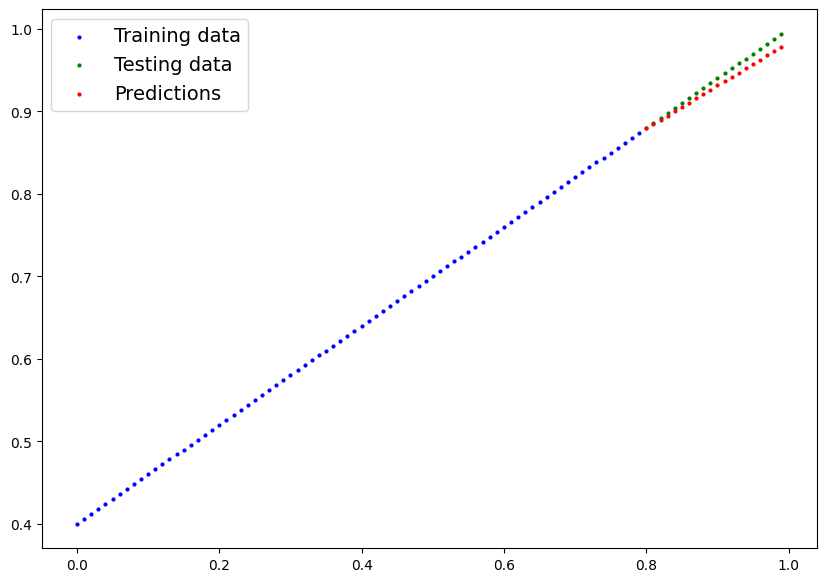

In [ ]:
model11.eval()

with torch.inference_mode():
  y_preds = model11(X_test_reg)


plot_predictions(train_data=X_train_reg.cpu(),
          train_labels=y_train_reg.cpu(),
          test_data=X_test_reg.cpu(),
          test_labels=y_test_reg.cpu(),
          predictions=y_preds.cpu());

In [ ]:
model11.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.6817],
                      [ 0.6647],
                      [-0.5416],
                      [ 0.6069],
                      [-0.2373],
                      [ 0.6904],
                      [-0.7770],
                      [-0.5046],
                      [ 0.3049],
                      [ 0.2114]])),
             ('layer1.bias',
              tensor([-0.2550,  0.5710,  0.6678, -0.7252, -0.5339,  0.8820, -0.3374, -0.3545,
                      -0.9676, -0.5727])),
             ('layer2.weight',
              tensor([[ 0.0790, -0.0417, -0.2295,  0.0074, -0.2160, -0.2683, -0.1741, -0.2768,
                       -0.2014,  0.3161],
                      [ 0.0597,  0.1733, -0.3200, -0.2077, -0.1053,  0.1366, -0.2783, -0.1363,
                       -0.1893,  0.0009],
                      [-0.1177, -0.0219, -0.2143, -0.2171, -0.1845, -0.1082, -0.2496,  0.2651,
                       -0.0628,  0.2721],
                      [ 0.09

Chính xác hơn nhưng không thể đạt được kq mong **muốn**

## lưu model

In [298]:
from pathlib import Path

# 1. Tạo path
MODEL_PATH = Path("class")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. lưu path
MODEL_NAME = "nn_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. lưu stats dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model3.state_dict(),
           f=MODEL_SAVE_PATH)

# 4. lưu cả model
FULL_MODEL_PATH = MODEL_PATH / 'model_full.pth'
print(f"Saving entire model to: {FULL_MODEL_PATH}")
torch.save(model3, FULL_MODEL_PATH)

Saving model to: class/nn_model.pth
Saving entire model to: class/model_full.pth


PyTorch hỗ trợ lưu trữ model dưới dạng **state_dict** (các tham số của mô hình) hoặc **toàn bộ mô hình**.

Lưu state_dict linh hoạt, hiệu quả hơn nhưng khi sử dụng cần tạo lại model y hệt.

Lưu cả model thì sẽ tốn dung lượng, kém linh hoạt nhưng khi sử dụng chỉ cần tải xuống trực tiếp.